In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [2]:
fList = []
with open("林淑芬_output.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '宜津', '主席', '行政院', '院長', '院長', '部會首長', '各位', '同仁', '院長', '政務', '次長', '德華', '比照', '簡任', '第十四', '職等', '因公請假', '率團', '赴韓', '參加', '仁川', '亞洲', '運動會', '請假', '請假', '整天', '整天', '整天', '國人', '關心', '到底', '甚麼', '東西', '可以', '不能', '國人', '自己', '家裡', '豬油', '自己', '橄欖油', '可是', '我們', '發現', '發生', '這麼', '食安', '風波', '衛生署', '竟然', '只是', '因為', '媒體', '關心', '還說', '外國', '發生', '五百多', '媒體', '不會', '這麼樣', '大風大浪', '地猛', '報導', '這種', '心態', '實在', '我們', '覺得', '難以', '接受', '我們', '美國', '發生', '五百多', '人家', '之所以', '報導', '是因為', '下游', '個案', '人家', '之所以', '報導', '自己', '國家', '下游', '個案', '是因為', '個案', '馬上', '解決', '可是', '你們', '臺灣', '丟臉', '全世界', '報導', '自己', '事件', '我們', '人家', '媒體', '美國', '各報', '本報', '法國', '全世界', '我們', 'mit', '信用', '搞砸', '結果', '我們', '署長', '還是', '一樣', '不知悔改', '覺得', '媒體', '甚至', '為了', '眷戀', '官位', '到處', '院長', '這種', '事情', '發生', '國外', '這麼', '源頭', '開始', '問題', '事件', '不是', '只有', '媒體', '報導', '人家', '官員', '早就', '可是', '我們', '卻是', '好官', '自為', '包括', '署長', '一樣', '覺得', '小事', '無所謂', '我們', '來看', '一下', '你們', '自己', '怎麼', '

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(28603 unique tokens: ['evenstar', 'ghp', 'gm', 'gmp', 'haccp']...)
------------------------------


In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 4), (1, 1), (2, 1), (3, 44), (4, 13), (5, 10), (6, 1), (7, 10), (8, 2), (9, 5), (10, 2), (11, 3), (12, 3), (13, 19), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 3), (20, 8), (21, 6), (22, 1), (23, 2), (24, 2), (25, 6), (26, 9), (27, 1), (28, 1), (29, 1), (30, 7), (31, 1), (32, 1), (33, 2), (34, 2), (35, 4), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 9), (50, 2), (51, 2), (52, 2), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 2), (66, 47), (67, 6), (68, 1), (69, 6), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 11), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 42), (87, 1), (88, 13), (89, 6), (90, 2), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 6), (99, 2), (100, 1), (101, 1), (102, 1), (103, 16), (104, 2), (105, 14), (106, 1), (107, 1), (10

In [7]:
import os

import gensim
# os.envirom.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = r'//Users/Binying/mallet/bin/mallet'
#'OS(C:)/mallet-2.0.8/bin/mallet'
ldamal = gensim.models.wrappers.LdaMallet(mallet_path, id2word=dict, corpus=corpus, num_topics=20)
output = open("CkipNewsCis18850-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('勞工', 0.02542759407069555), ('工時', 0.02411630558722919), ('部長', 0.023261117445838083), ('小時', 0.02297605473204105), ('我們', 0.020695553021664766), ('勞動', 0.012542759407069556), ('會議', 0.012371721778791334), ('所以', 0.0120866590649943), ('勞資', 0.011687571265678449), ('可以', 0.011345496009122007), ('勞基法', 0.011174458380843785), ('美珠', 0.010775370581527936), ('工作', 0.00992018244013683), ('他們', 0.009635119726339795), ('工會', 0.009578107183580388), ('如果', 0.009464082098061573), ('勞動部', 0.008722919042189282), ('條件', 0.008494868871151653), ('委員', 0.008380843785632839), ('資方', 0.008038768529076397)]

strTM =  1[('部長', 0.02265662362505978), ('醫院', 0.02032520325203252), ('時中', 0.018950263032042086), ('我們', 0.01757532281205165), ('醫療', 0.014526542324246772), ('沒有', 0.01368962219033955), ('可以', 0.012254901960784314), ('署長', 0.01213534194165471), ('通報', 0.009206121472979436), ('淑芬', 0.009026781444285032), ('不是', 0.008668101386896223), ('疫苗', 0.008428981348637015), ('試驗', 0.00795074127211860

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [9]:
lim=30; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.27552322145709324
Num_topics:  6  Coherence Score=  0.2914302684921442
Num_topics:  9  Coherence Score=  0.31198296564230216
Num_topics:  12  Coherence Score=  0.33403944051530465
Num_topics:  15  Coherence Score=  0.33119931989442297
Num_topics:  18  Coherence Score=  0.37402124999196196
Num_topics:  21  Coherence Score=  0.3614851085345551
Num_topics:  24  Coherence Score=  0.3817588020001268
Num_topics:  27  Coherence Score=  0.3918257705836987


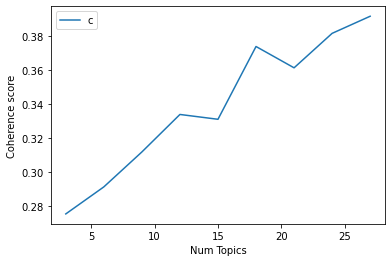

In [10]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.2755
Num Topics = 6  has Coherence Value of 0.2914
Num Topics = 9  has Coherence Value of 0.312
Num Topics = 12  has Coherence Value of 0.334
Num Topics = 15  has Coherence Value of 0.3312
Num Topics = 18  has Coherence Value of 0.374
Num Topics = 21  has Coherence Value of 0.3615
Num Topics = 24  has Coherence Value of 0.3818
Num Topics = 27  has Coherence Value of 0.3918
Optimal Topic Num = 27  Highest Value = 0.3918257705836987


In [12]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.021*"我們" + 0.015*"委員" + 0.015*"部長" + 0.014*"院長" + 0.009*"計畫" + 0.009*"所以" '
  '+ 0.008*"淑芬" + 0.008*"這個" + 0.008*"地方" + 0.007*"政府" + 0.007*"國家" + '
  '0.007*"可以" + 0.006*"土地" + 0.006*"國土" + 0.006*"沒有" + 0.006*"行政院" + '
  '0.005*"業者" + 0.005*"版本" + 0.005*"環評" + 0.005*"就是" + 0.005*"規定" + 0.005*"當時" '
  '+ 0.005*"經濟部" + 0.005*"現在" + 0.005*"修法"'),
 (1,
  '0.036*"委員" + 0.029*"我們" + 0.021*"部長" + 0.019*"淑芬" + 0.018*"進口" + 0.018*"沒有" '
  '+ 0.015*"署長" + 0.014*"丙煌" + 0.013*"你們" + 0.012*"主任" + 0.011*"資料" + '
  '0.009*"主席" + 0.009*"公司" + 0.008*"報告" + 0.008*"他們" + 0.008*"院長" + 0.008*"調查" '
  '+ 0.008*"證明" + 0.008*"所以" + 0.008*"代理" + 0.007*"食品" + 0.007*"業者" + '
  '0.007*"知道" + 0.007*"郁美" + 0.006*"有沒有"'),
 (2,
  '0.019*"小時" + 0.018*"我們" + 0.018*"部長" + 0.016*"工時" + 0.015*"勞工" + 0.014*"勞動" '
  '+ 0.013*"會議" + 0.012*"勞基法" + 0.010*"勞資" + 0.010*"工作" + 0.010*"所以" + '
  '0.009*"法律" + 0.009*"美珠" + 0.009*"原則" + 0.009*"他們" + 0.009*"適用" + '
  '0.009*"勞動部" + 0.008*"可以" + 0.008*"條件" + 0.008*"工會" + 0.00